<a href="https://colab.research.google.com/github/rlatjsdn71/2025_IS/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [ ]:
batch_size = 100

In [ ]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1,16,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.Conv2d(16,32,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32,64,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2,2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(64,128,3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Conv2d(128,256,3,padding=1),
        nn.ReLU()
    )
  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(batch_size,-1)
    return out

class Decoder(nn.Module):
  def __init__(self):
    super(Decoder,self).__init__()
    self.layer1 = nn.Sequential(
      nn.ConvTranspose2d(256,128,3,2,1,1),
      nn.ReLU(),
      nn.BatchNorm2d(128),
      nn.ConvTranspose2d(128,64,3,1,1),
      nn.ReLU(),
      nn.BatchNorm2d(64)
    )
    self.layer2 = nn.Sequential(
      nn.ConvTranspose2d(64,16,3,1,1),
      nn.ReLU(),
      nn.BatchNorm2d(16),
      nn.ConvTranspose2d(16,1,3,2,1,1),
      nn.ReLU()
    )
  def forward(self,x):
    out = x.view(batch_size,256,7,7)
    out = self.layer1(out)
    out = self.layer2(out)
    return out

In [ ]:
mnist_train = dset.MNIST("./data/MNIST", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./data/MNIST", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.48MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.70MB/s]


In [ ]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
num_epoch = 10
Learning_rate = 0.0002

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = Encoder().to(device)
decoder = Decoder().to(device)

parameters = itertools.chain(encoder.parameters(), decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=Learning_rate)

In [ ]:
for i in range(1):
  for j,[image, label] in enumerate(test_loader):
    image = image.to(device)
    z = encoder(image)
    output = decoder(z)
    loss = loss_func(output,image)
    # if j % 10 == 0:
    # print(loss)
  print("loss is", loss.cpu().item())


loss is 0.8275309801101685


torch.Size([100, 28, 28])


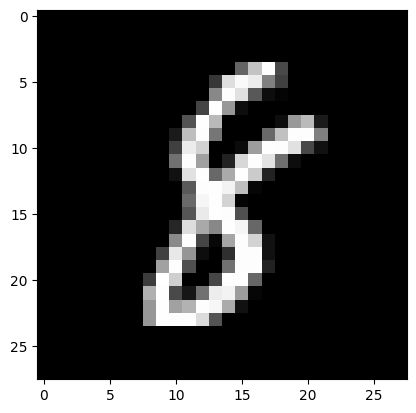

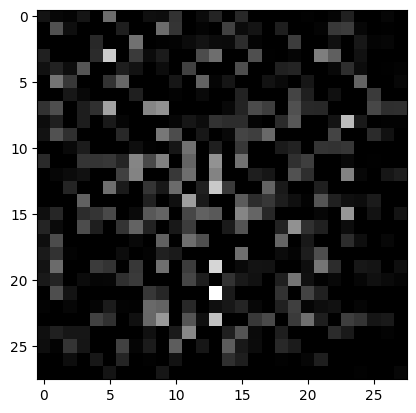

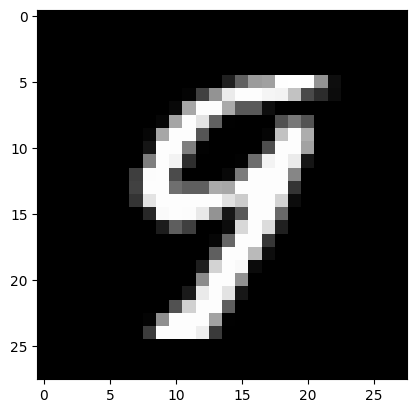

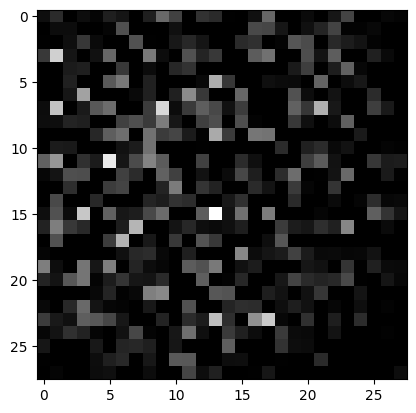

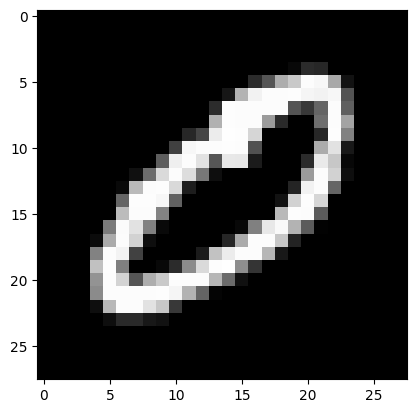

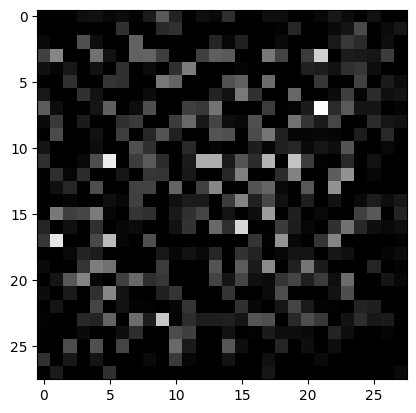

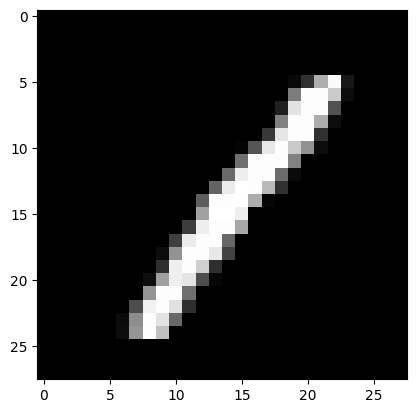

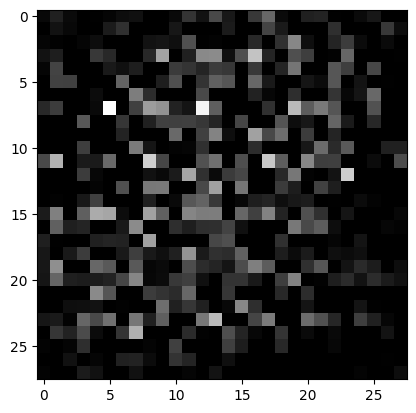

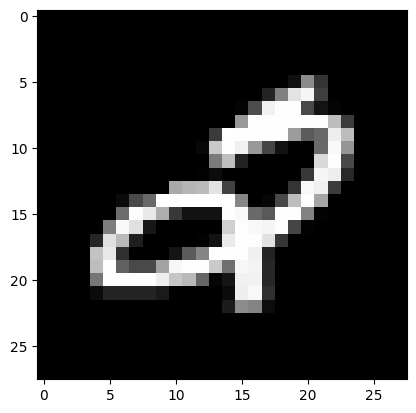

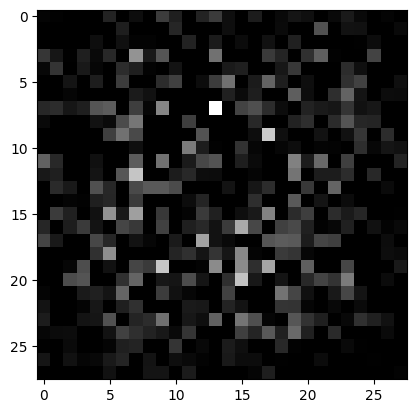

In [ ]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()

In [ ]:
for i in range(num_epoch):
  for j,[image, label] in enumerate(train_loader):
    optimizer.zero_grad()

    image = image.to(device)
    z = encoder(image)
    output = decoder(z)
    loss = loss_func(output, image)

    loss.backward()
    optimizer.step()

  print("loss is", loss.cpu().item())

KeyboardInterrupt: 

In [ ]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
  plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()